# Fiber-views package example

## Introduction:
This example will show the basic functionality of the Fiber-views package

Fiber-views is a python package that extracts reads overlapping one or more genomic loci from processed Fiber-seq BAM files. Fiber-views presents the read data in a window around the specified locus/loci as an anndata object, containing matrices representing: read sequence, methylation (m6A and mCpG), and annotated regions (like nucleosomes and methylation accessible patches (MSPs)), as well as other metadata for each read. Useful functions are also provided for working with the data in this format, including functions for aggregating, and basic plotting.

In order to run this example make sure you have activated the fiber-views conda environment

## importing packages
first we will import the packages we will use in this tutorial, including fiber_views which we will import as `fv`

In [29]:
import numpy as np
import pandas as pd

import os
import seaborn as sns
import matplotlib.pyplot as plt
import fiber_views as fv
import pysam

import anndata as ad
from scipy.sparse import csr_matrix, coo_matrix, vstack

import warnings
warnings.filterwarnings('ignore')



## Loading a BAM file and getting coordinates of gene starts

The method for creating a FiberView object requires a BAM file, and pandas dataframe with one or more genomic loci. 

#### About the example data
The BAM file we are using in this example contains reads mapping to the first 100,000 bases of chromosome 3 of Arabdiposis. 



In [30]:
# load the BAM file using pysam
bamfile = pysam.AlignmentFile("data/chr3_sample.aligned.fiberseq.bam", "rb")


bed_data = fv.read_bed('data/TAIR10_genes.bed')
gene_starts_df = fv.bed_to_anno_df(bed_data)
# subset to only include sites in the region our BAM covers.
gene_starts_df.query('seqid == "chr3" & pos < 100000', inplace=True) 
gene_starts_df.head()

,seqid,pos,strand,gene_id,score
11979,chr3,4342,+,AT3G01010,NaN
11980,chr3,4159,-,AT3G01015,7.0
11981,chr3,5104,+,AT3G01020,NaN
11982,chr3,6657,+,AT3G01030,NaN
11983,chr3,8957,+,AT3G01040,521.0


## Creating a FiberView object



In [31]:
fview = fv.FiberView(bamfile, gene_starts_df.iloc[[15]], window = (-2000, 2000), fully_span=False)

fview


11994


[E::bam_parse_basemod] Insufficient number of entries in ML tag
[E::bam_parse_basemod] Insufficient number of entries in ML tag
[E::bam_parse_basemod] Insufficient number of entries in ML tag
[E::bam_parse_basemod] Insufficient number of entries in ML tag
[E::bam_parse_basemod] Insufficient number of entries in ML tag
[E::bam_parse_basemod] Insufficient number of entries in ML tag
[E::bam_parse_basemod] Insufficient number of entries in ML tag
[E::bam_parse_basemod] Insufficient number of entries in ML tag


AnnData object with n_obs × n_vars = 199 × 4000
    obs: 'seqid', 'pos', 'strand', 'gene_id', 'score', 'read_name', 'read_length', 'read_flag', 'np', 'ec', 'rq', 'site_name'
    var: 'pos'
    uns: 'region_report_interval', 'is_agg', 'region_base_names', 'mods', 'bin_width'
    layers: 'seq', 'm6a', 'cpg', 'nuc_pos', 'nuc_len', 'nuc_score', 'msp_pos', 'msp_len', 'msp_score', 'cpg_sites'

In [27]:
fview.obs

,seqid,pos,strand,gene_id,score,read_name,read_length,read_flag,np,ec,rq,site_name
0,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/164234076/ccs,27463,0,8,9.04693,0.994069,chr3:46718(+)
1,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/32573867/ccs,23030,0,12,12.39460,0.999443,chr3:46718(+)
2,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/111084045/ccs,26567,0,10,10.63640,0.998920,chr3:46718(+)
3,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/3016778/ccs,24604,0,9,9.39160,0.999179,chr3:46718(+)
4,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/95748392/ccs,20864,0,11,11.27880,0.999627,chr3:46718(+)
...,...,...,...,...,...,...,...,...,...,...,...,...
194,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/140706285/ccs,19295,16,15,15.04360,0.999919,chr3:46718(+)
195,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/144181999/ccs,18628,2064,14,14.73960,0.999668,chr3:46718(+)
196,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/55117240/ccs,17614,0,14,15.23600,0.999901,chr3:46718(+)
197,chr3,46718,+,AT3G01142,NaN,m54329U_220515_073850/91686877/ccs,17046,2064,11,11.24860,0.999730,chr3:46718(+)


## simple_region_plot


<AxesSubplot:xlabel='pos'>

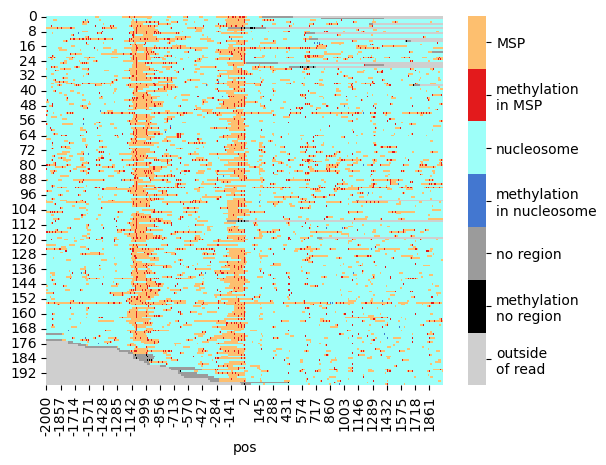

In [28]:
fv.tools.simple_region_plot(fview)

### pop out plot

you can use `%matplotlib qt` to have plots appear as pop out windows 
and `%matplotlib inline` to go back to showing plots in this notebook

In [33]:
%matplotlib qt
fv.tools.simple_region_plot(fview)

<AxesSubplot:xlabel='pos'>

In [41]:
# for the rest of this notebook we will plot inline
%matplotlib inline

## Subsetting

See the anndata documention for how these objects can be subset.

here we will subset our current object to zoom in on a particular region and only keep the first 20 fibers

<AxesSubplot:xlabel='pos'>

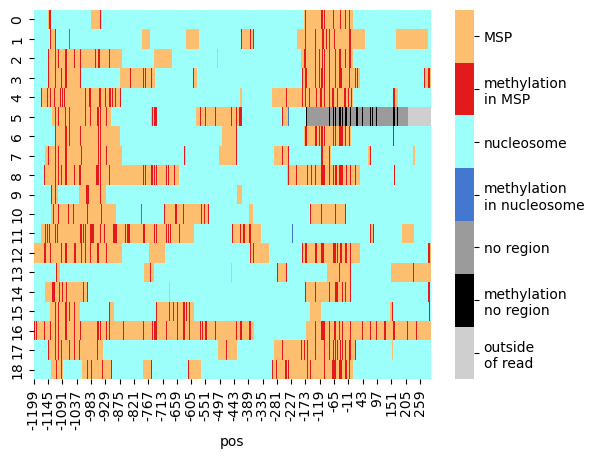

In [42]:
small_view = fview[1:20, (fview.var.pos > -1200) & (fview.var.pos < 300)]
fv.tools.simple_region_plot(small_view)

<AxesSubplot:>

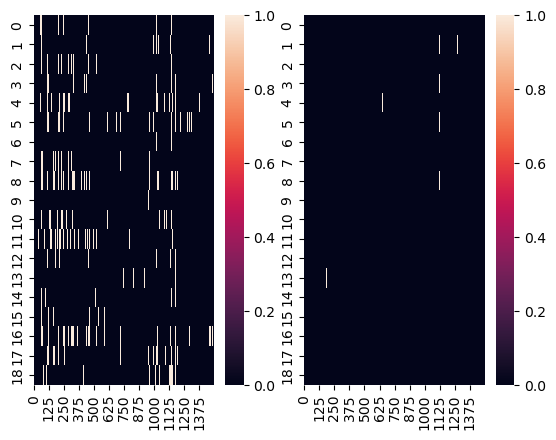

In [51]:
fig, axs = plt.subplots(1, 3)
plt.axes(axs[0])
sns.heatmap(small_view.layers['m6a'].toarray())
plt.axes(axs[1])
sns.heatmap(small_view.layers['cpg'].toarray())



<AxesSubplot:>

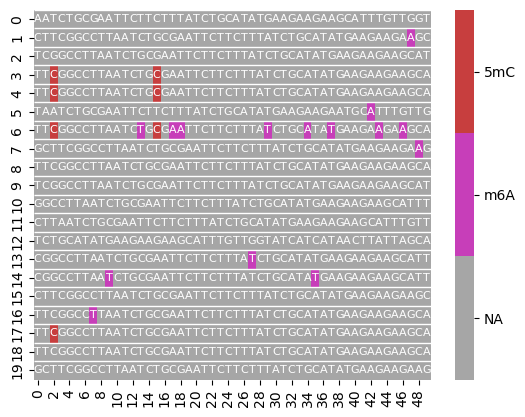

In [54]:
%matplotlib inline

smaller_view = fview[0:20, 0:50]
fv.tools.plot_methylation(smaller_view, label_bases=True)